# Uber Data Analysis

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('UberDataset.csv')
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [3]:
df.shape

(1156, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

# Data Cleaning

In [6]:
df['PURPOSE'].fillna('Not Available', inplace=True)

In [7]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not Available
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [8]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [14]:
from datetime import datetime

df['Date'] = pd.DataFrame(df['START_DATE'].dt.date)

In [19]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Time,Date
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11:00,2016-01-01
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,01:25:00,2016-01-02
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25:00,2016-01-02


In [13]:
df['Time'] = pd.DataFrame(df['START_DATE'].dt.time)
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,2016-01-02,01:25:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00


In [34]:
# Convert datetime.time to numeric hour
df['Hour'] = df['Time'].apply(lambda t: t.hour)

# Now apply pd.cut on the numeric hours
df['Day-Night'] = pd.cut(
    x=df['Hour'],
    bins=[0, 10, 15, 19, 24],
    labels=['Morning', 'Afternoon', 'Evening', 'Night'],
    right=False,
    include_lowest=True
)


In [36]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Time,Date,Hour,Day-Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11:00,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,01:25:00,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25:00,2016-01-02,20.0,Night


In [ ]:
df.isnull().sum()

START_DATE    735
END_DATE      736
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE         0
Time          735
Date          735
Hour          735
Day-Night     735
dtype: int64

In [38]:
df.dropna(inplace=True)

In [39]:
df.shape

(420, 11)

# Data Visualization










# 1) In which category do people book the most Uber rides?

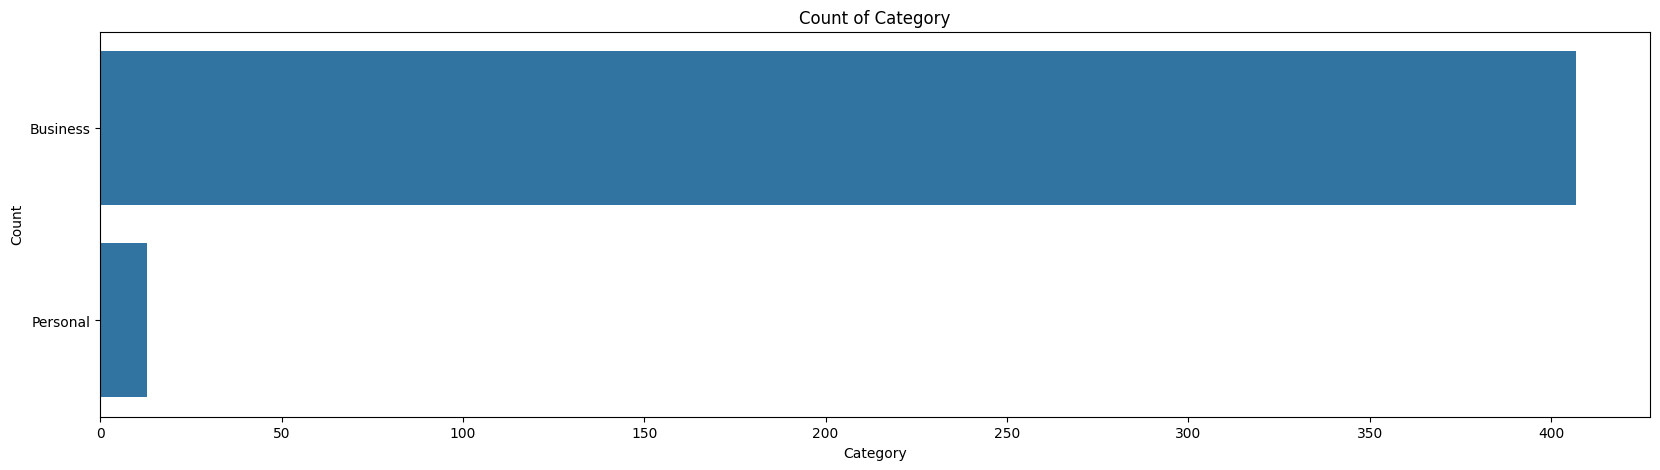

In [43]:
plt.figure(figsize=(20, 5))
sns.countplot(df['CATEGORY'])
plt.title('Count of Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 2) For which purpose do people book Uber rides the most?

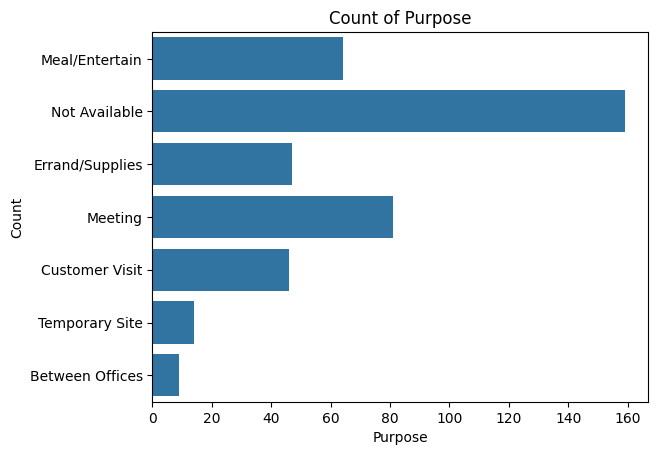

In [44]:
sns.countplot(df['PURPOSE'])
plt.title('Count of Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

# 3) At what time do people book cabs the most from Uber?

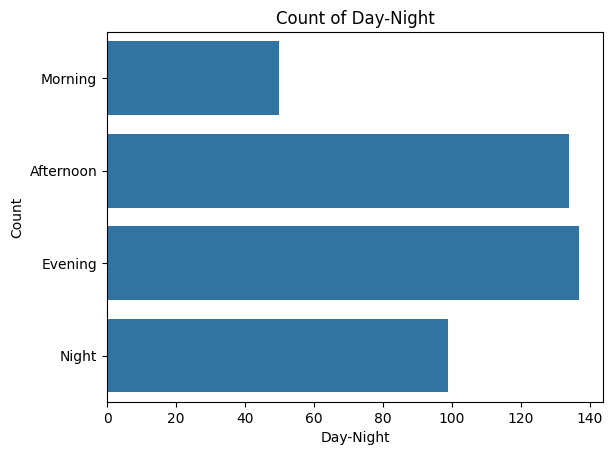

In [45]:
sns.countplot(df['Day-Night'])
plt.title('Count of Day-Night')
plt.xlabel('Day-Night')
plt.ylabel('Count')
plt.show()

# 4) In which months do people book Uber rides less frequently?

In [46]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Time,Date,Hour,Day-Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11:00,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,01:25:00,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25:00,2016-01-02,20.0,Night


In [57]:
# Step 1: Extract month numbers from START_DATE
df['Month'] = df['START_DATE'].dt.month

# Step 2: Define the month name labels
month_labels = {
    1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'Apr', 5.0: 'May', 6.0: 'Jun',
    7.0: 'Jul', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'
}

# Step 3: Replace month numbers with names
df['Month'] = df['Month'].map(month_labels)

# Step 4: Count occurrences of each month (in order)
mon = df['Month'].value_counts(sort=False)


In [60]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Time,Date,Hour,Day-Night,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11:00,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,01:25:00,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25:00,2016-01-02,20.0,Night,Jan


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'VALUE Count')]

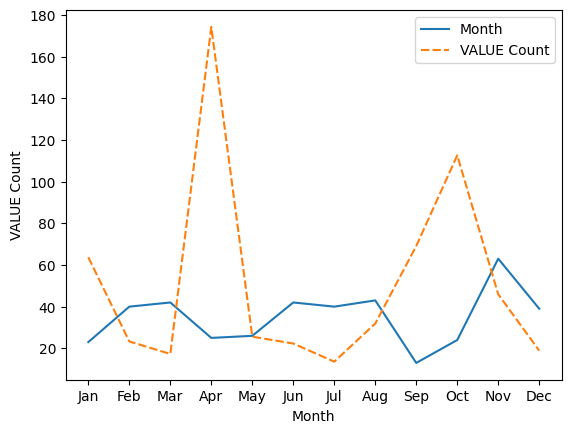

In [61]:
df1 = pd.DataFrame({
    'Month': mon.values,
    'VALUE Count': df.groupby('Month',sort=False)['MILES'].max()
})

p = sns.lineplot(data=df1)
p.set(xlabel='Month', ylabel='VALUE Count')


# 5) On which days of the week do people book Uber rides the most?

In [63]:
df['Day'] = df['START_DATE'].dt.weekday

day_labels = {
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}

df['Day'] = df['Day'].map(day_labels)

In [65]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Time,Date,Hour,Day-Night,Month,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11:00,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,01:25:00,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25:00,2016-01-02,20.0,Night,Jan,Sat


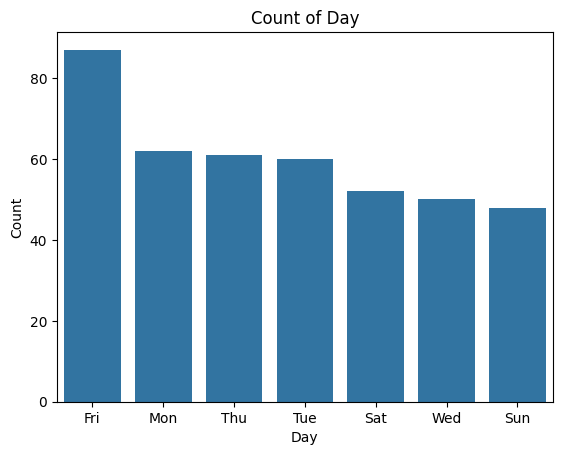

In [66]:
day_labels = df['Day'].value_counts()

sns.barplot(x=day_labels.index, y=day_labels)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Count of Day')
plt.show()
 

# 6) How many miles do people usually book a cab for through Uber?

<Axes: ylabel='MILES'>

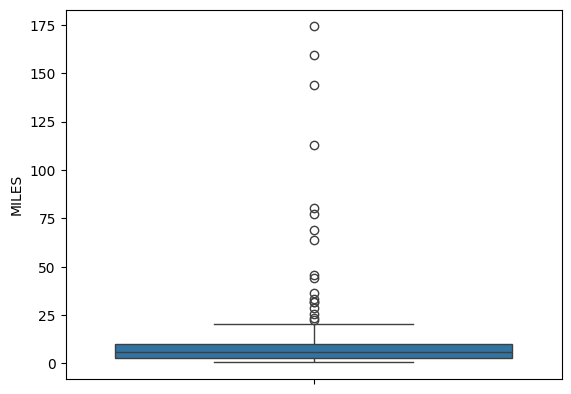

In [70]:
sns.boxplot(df['MILES'])

<Axes: ylabel='MILES'>

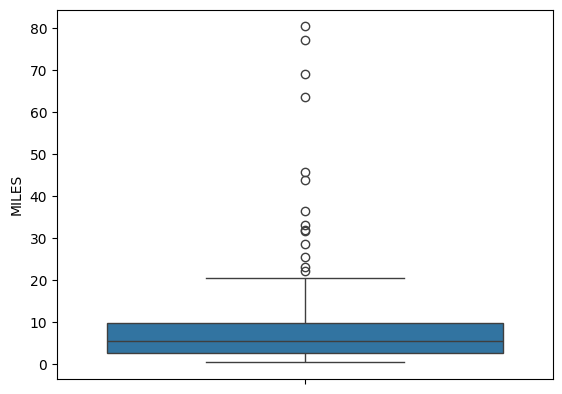

In [74]:
sns.boxplot(df[df['MILES']<100]['MILES'])

<Axes: ylabel='MILES'>

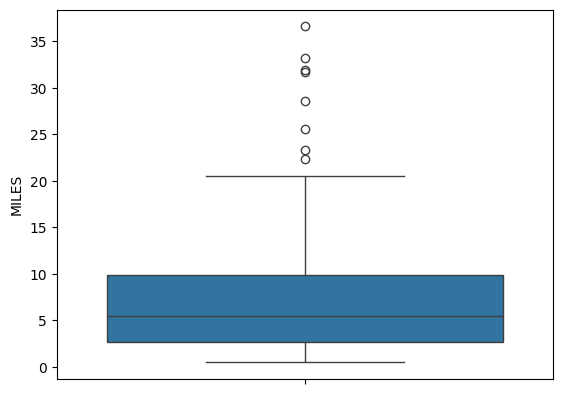

In [73]:
sns.boxplot(df[df['MILES']<40]['MILES'])

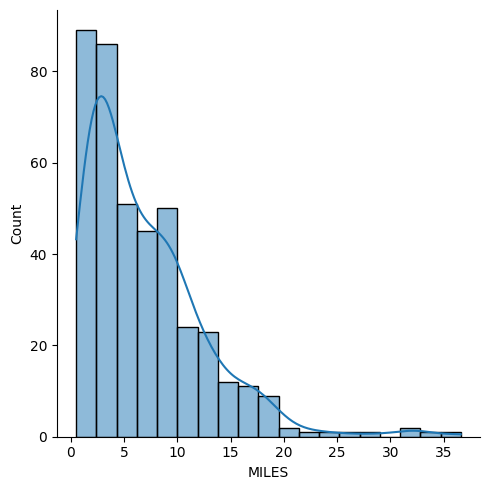

In [75]:
sns.displot(df[df['MILES']<40]['MILES'], kde=True)

# Conclustion:
# 1) In which category do people book the most Uber rides?
- Business

# 2) For which purpose do people book Uber rides the most?
- Personal

# 3) At what time do people book cabs the most from Uber?
- Evening

# 4) In which months do people book Uber rides less frequently?
- March

# 5) On which days of the week do people book Uber rides the most?
- Friday

# 6) How many miles do people usually book a cab for through Uber?
- 0-20 miles
